[View in Colaboratory](https://colab.research.google.com/github/KyleWSmith/Pandas/blob/master/AirBnb_Neighbourhood_Analysis.ipynb)

#Join Airbnb Data

##Set Environment

In [0]:
!pip install geopandas

In [0]:
import pandas as pd

In [0]:
import geopandas as gpd

In [0]:
from google.colab import files

##Import Data

**The model can be adapted to any city by modifying the url below**

In [0]:
hoods_url = 'http://data.insideairbnb.com/united-states/wa/seattle/2018-05-17/visualisations/neighbourhoods.geojson'

In [0]:
listings_url = 'http://data.insideairbnb.com/united-states/wa/seattle/2018-05-17/visualisations/listings.csv'

Create a Pandas dataframe for the listings and a geodataframe for the neighborhoods.

In [0]:
listings = pd.read_csv(listings_url) 

In [0]:
hoods = gpd.read_file(hoods_url)

##EDA

In [43]:
hoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
neighbourhood          91 non-null object
neighbourhood_group    91 non-null object
geometry               91 non-null object
dtypes: object(3)
memory usage: 2.2+ KB


##Grouping and Merging

Group listings by neighbourhood

In [0]:
hoods_grp = listings.groupby("neighbourhood")

In [0]:
hoods_grp.median()

Aggregate price, and location data for neighborhood listings

In [0]:
hoods_prc_lat_long = hoods_grp.agg({"price":"median",
              "latitude":"mean",
              "longitude":"mean"})

In [44]:
hoods_prc_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
neighbourhood    88 non-null object
price            88 non-null float64
latitude         88 non-null float64
longitude        88 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


Reset index

In [0]:
hoods_prc_lat_long.reset_index(inplace=True)

Merge data frames

In [0]:
 seattle_merged = pd.merge(hoods_prc_lat_long, hoods, on="neighbourhood")

In [69]:
seattle_merged.head()

,neighbourhood,price,latitude,longitude,neighbourhood_group,geometry
0,Adams,100.5,47.671865,-122.386358,Ballard,"(POLYGON ((-122.376337 47.675918, -122.376214 ..."
1,Alki,147.5,47.575554,-122.406591,West Seattle,"(POLYGON ((-122.381531 47.589496, -122.381819 ..."
2,Arbor Heights,99.0,47.510238,-122.379361,West Seattle,"(POLYGON ((-122.376896 47.517489, -122.375998 ..."
3,Atlantic,87.5,47.595148,-122.304682,Central Area,"(POLYGON ((-122.316773 47.601716, -122.312306 ..."
4,Belltown,150.0,47.615084,-122.346483,Downtown,"(POLYGON ((-122.358447 47.618608, -122.357807 ..."


In [0]:
seattle_merged=gpd.GeoDataFrame(seattle_merged)

In [0]:
seattle_merged.to_file("seattle_merged.geojson", driver="GeoJSON")

In [0]:
files.download('seattle_merged.geojson')

In [0]:
seattle_merged.to_csv('seattle_merge.csv')

In [0]:
files.download('seattle_merge.csv')

###Add # of listings per neighborhood

In [0]:
counts =  listings["neighbourhood"].value_counts()

In [0]:
counts.head(2)

In [0]:
counts.rename({"index":"neighbourhood"}, inplace=True)

In [0]:
counts.reset_index(inplace=True)

In [0]:
counts["neighbourhood"] = counts["index"]

In [0]:
seattle_merged = pd.merge(seattle_merged, counts, on="neighbourhood")

In [135]:
seattle_merged.head()

,neighbourhood,price,latitude,longitude,neighbourhood_group,geometry,count
0,Adams,100.5,47.671865,-122.386358,Ballard,"(POLYGON ((-122.376337 47.675918, -122.376214 ...",132
1,Alki,147.5,47.575554,-122.406591,West Seattle,"(POLYGON ((-122.381531 47.589496, -122.381819 ...",90
2,Arbor Heights,99.0,47.510238,-122.379361,West Seattle,"(POLYGON ((-122.376896 47.517489, -122.375998 ...",21
3,Atlantic,87.5,47.595148,-122.304682,Central Area,"(POLYGON ((-122.316773 47.601716, -122.312306 ...",122
4,Belltown,150.0,47.615084,-122.346483,Downtown,"(POLYGON ((-122.358447 47.618608, -122.357807 ...",468


In [0]:
sea_cols = seattle_merged.columns.tolist()

In [0]:
seattle_merged.to_file("seattle_merged_counts.geojson", driver="GeoJSON")

In [0]:
files.download('seattle_merged_counts.geojson')

In [0]:
seattle_merged.to_csv("seattle_merged_counts.csv")

In [0]:
files.download('seattle_merged_counts.csv')

In [0]:
sea_cols = ['neighbourhood',
 'price',
 'count'
 'latitude',
 'longitude',
 'neighbourhood_group',
 'geometry'
 ]

##Plot it

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
!pip install descartes

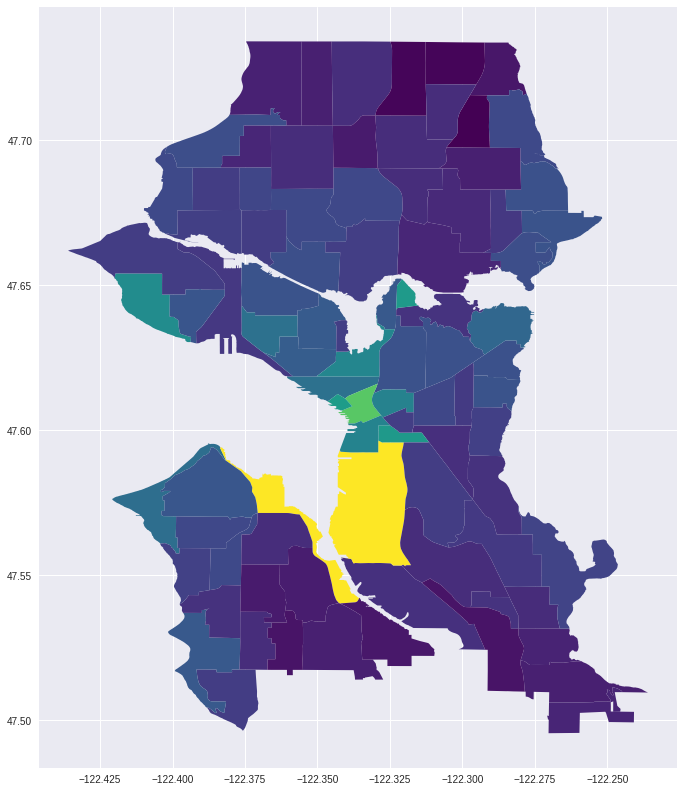

In [159]:
seattle_merged.plot(figsize=(14,14), cmap="viridis",column="price")

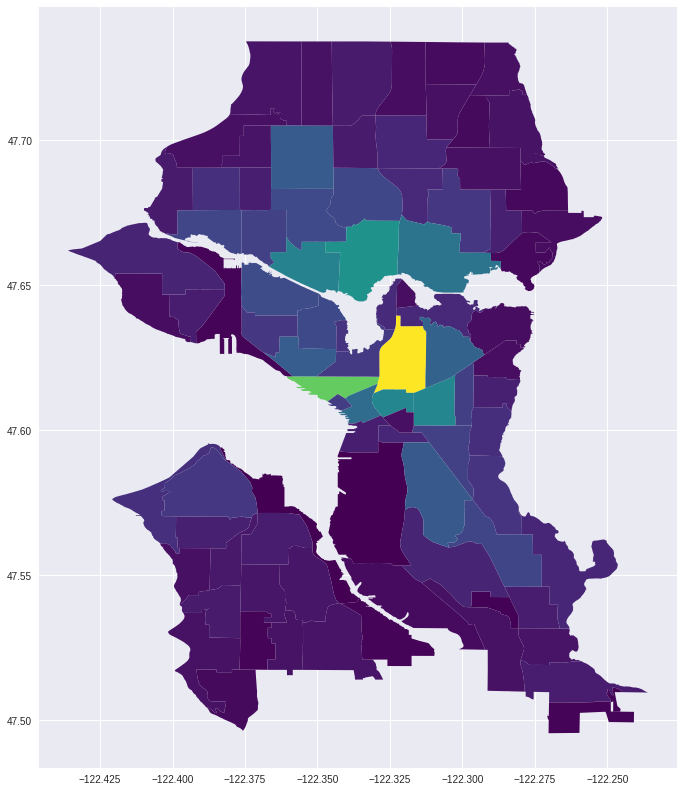

In [160]:
seattle_merged.plot(figsize=(14,14), cmap="viridis",column="count")